In [85]:
import pandas as pd

# Load dataset
df = pd.read_csv("water_pollution_disease.csv")

# Preview first 5 rows
df.head()


,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,...,33,44,76.16,57057,96.92,84.61,63.23,2800,4.94,593
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,27,8,77.30,17220,84.73,73.37,29.12,1572,16.93,234
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,39,50,48.45,86022,58.37,72.86,93.56,2074,21.73,57
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,...,33,13,95.66,31166,39.07,71.07,94.25,937,3.79,555
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,...,31,68,58.78,25661,23.03,55.55,69.23,2295,31.44,414


Water Treatment Method    24.9
dtype: float64


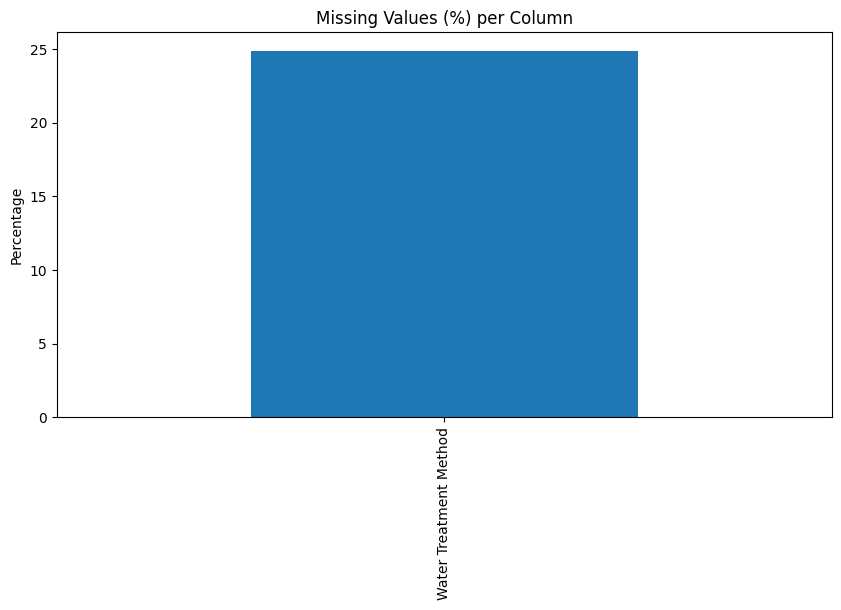

In [86]:
import matplotlib.pyplot as plt

# Percentage of missing values per column
missing_percent = df.isnull().mean() * 100

# Keep only columns with missing values
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Print table
print(missing_percent)

# Visualize
plt.figure(figsize=(10,5))
missing_percent.plot(kind="bar")
plt.title("Missing Values (%) per Column")
plt.ylabel("Percentage")
plt.show()


In [87]:

# Fill missing values in "Water Treatment Method" with the mode
df["Water Treatment Method"].fillna(df["Water Treatment Method"].mode()[0], inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_13808\4229214540.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Water Treatment Method"].fillna(df["Water Treatment Method"].mode()[0], inplace=True)


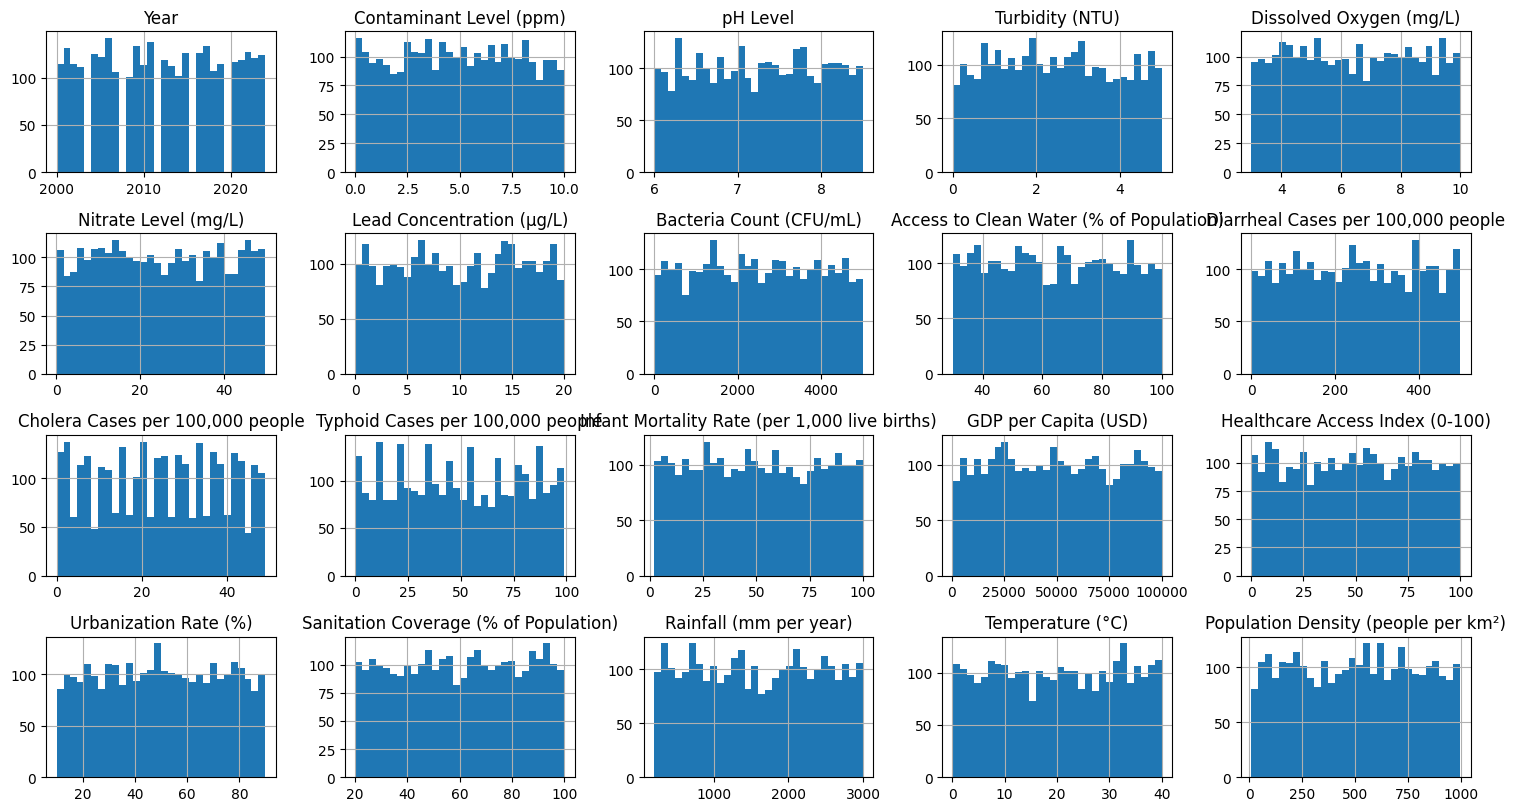

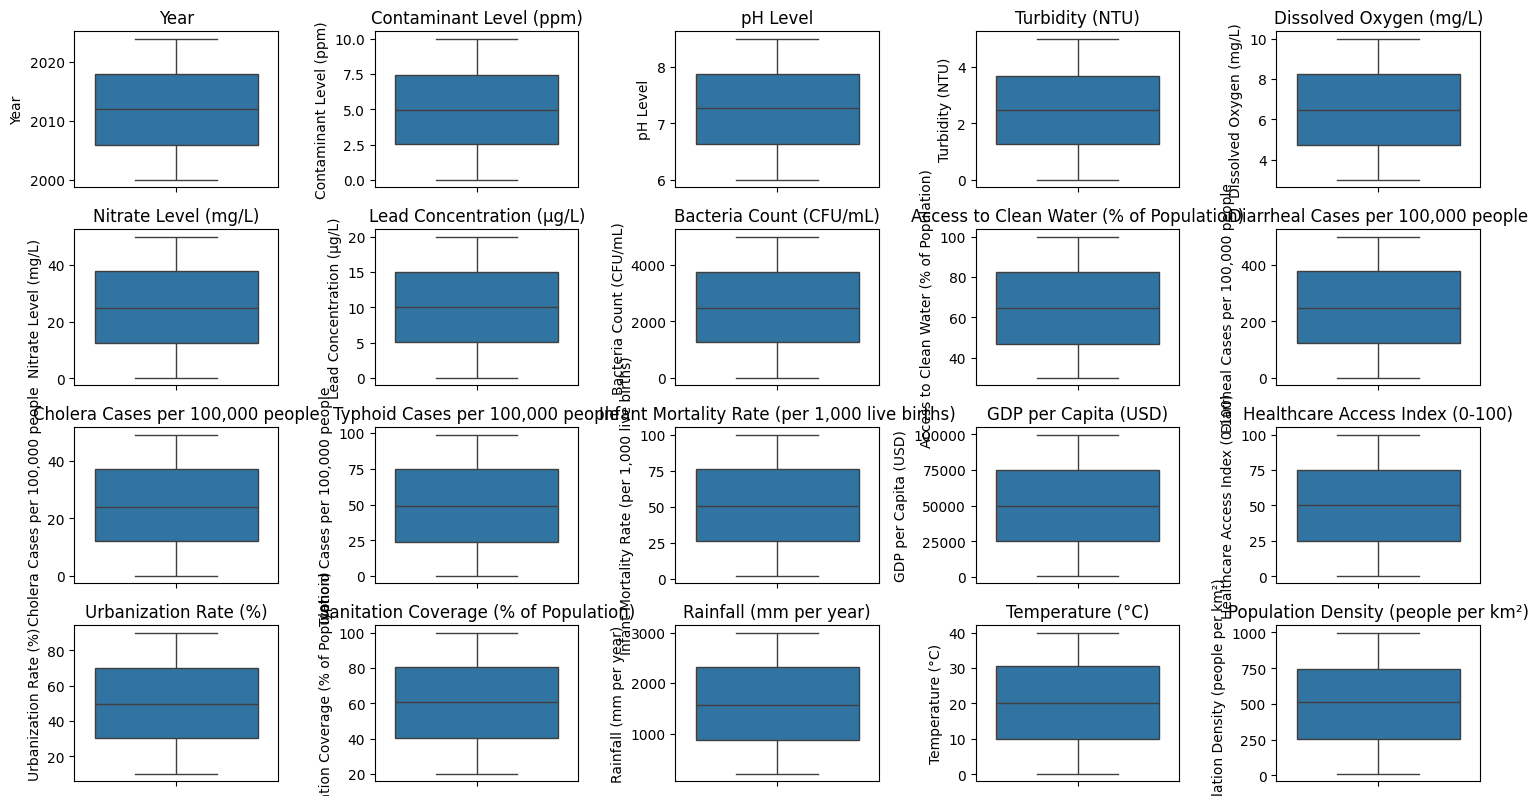

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
df[num_cols].hist(bins=30, figsize=(15, 10), layout=(5,5))
plt.tight_layout()
plt.show()

# Boxplots for outlier inspection
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### Normal distribution in many cases and no presence of outliers . so we can opt to use one scaler which is Standard scaler

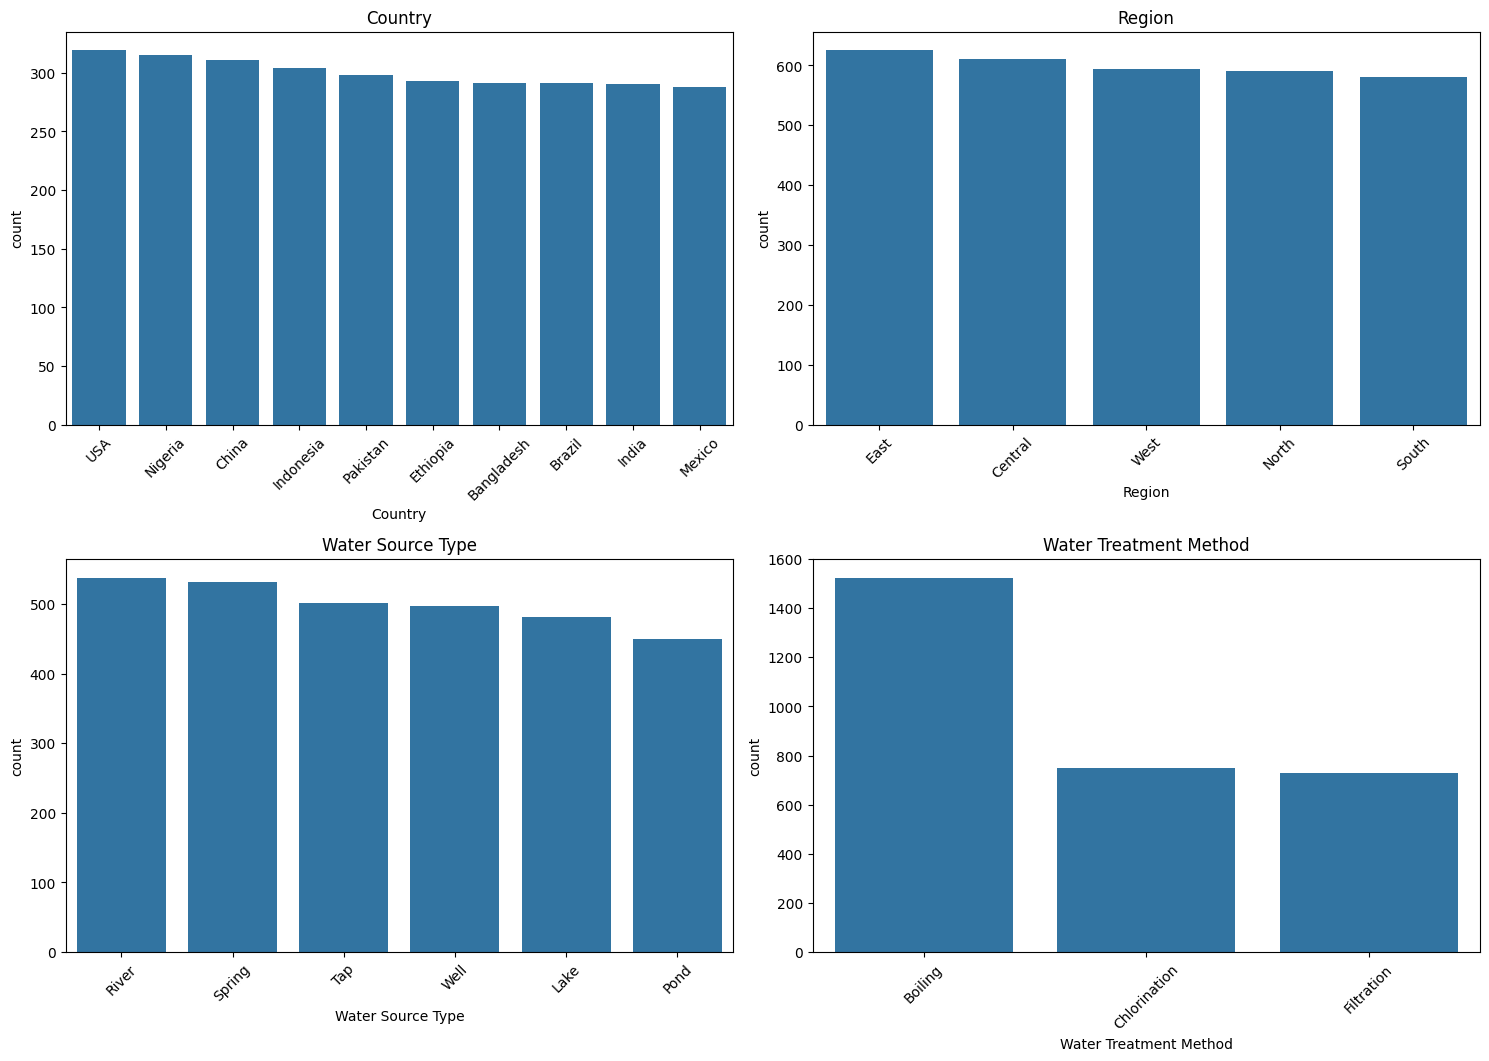

In [89]:
cat_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 15))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols)//2+1, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()


In [90]:
# Define threshold (75th percentile instead of median)
threshold = df["Cholera Cases per 100,000 people"].quantile(0.75)

# Create binary classification target
df["Cholera_Risk"] = df["Cholera Cases per 100,000 people"].apply(
    lambda x: "High" if x > threshold else "Low"
)

print("Threshold used:", threshold)
print(df["Cholera_Risk"].value_counts())


Threshold used: 37.0
Cholera_Risk
Low     2315
High     685
Name: count, dtype: int64


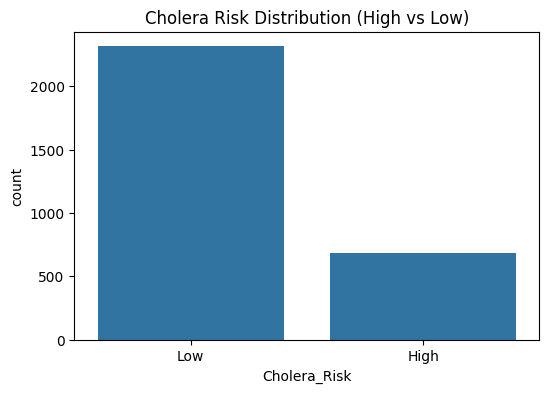

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="Cholera_Risk", data=df)
plt.title("Cholera Risk Distribution (High vs Low)")
plt.show()


#### Classification problem with class imbalance → might need resampling (SMOTE/undersampling) later.

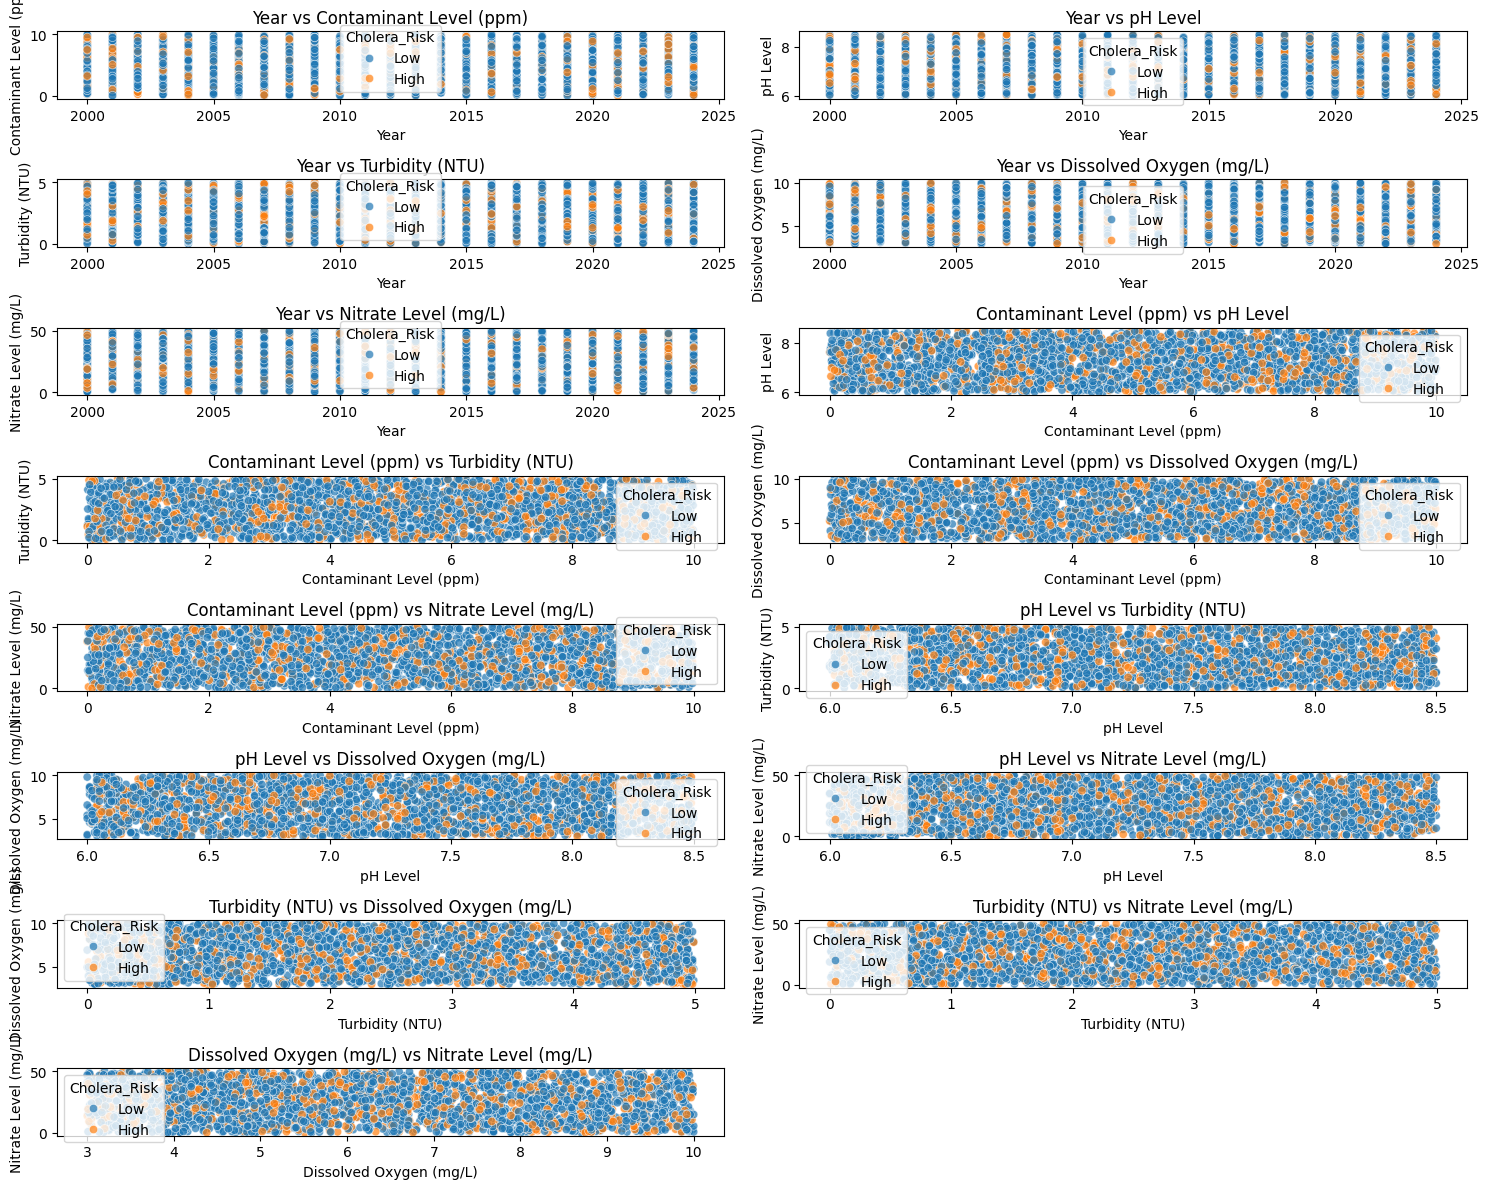

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Select numerical features (drop the original target column)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop("Cholera Cases per 100,000 people")

# Choose pairs of numerical features to plot
pairs = list(combinations(num_cols[:6], 2))  # first 6 numerical columns, change number if you want more

plt.figure(figsize=(15, 12))
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(len(pairs)//2 + 1, 2, i)
    sns.scatterplot(data=df, x=x, y=y, hue="Cholera_Risk", alpha=0.7)
    plt.title(f"{x} vs {y}")
plt.tight_layout()
plt.show()


### Not linearly separable

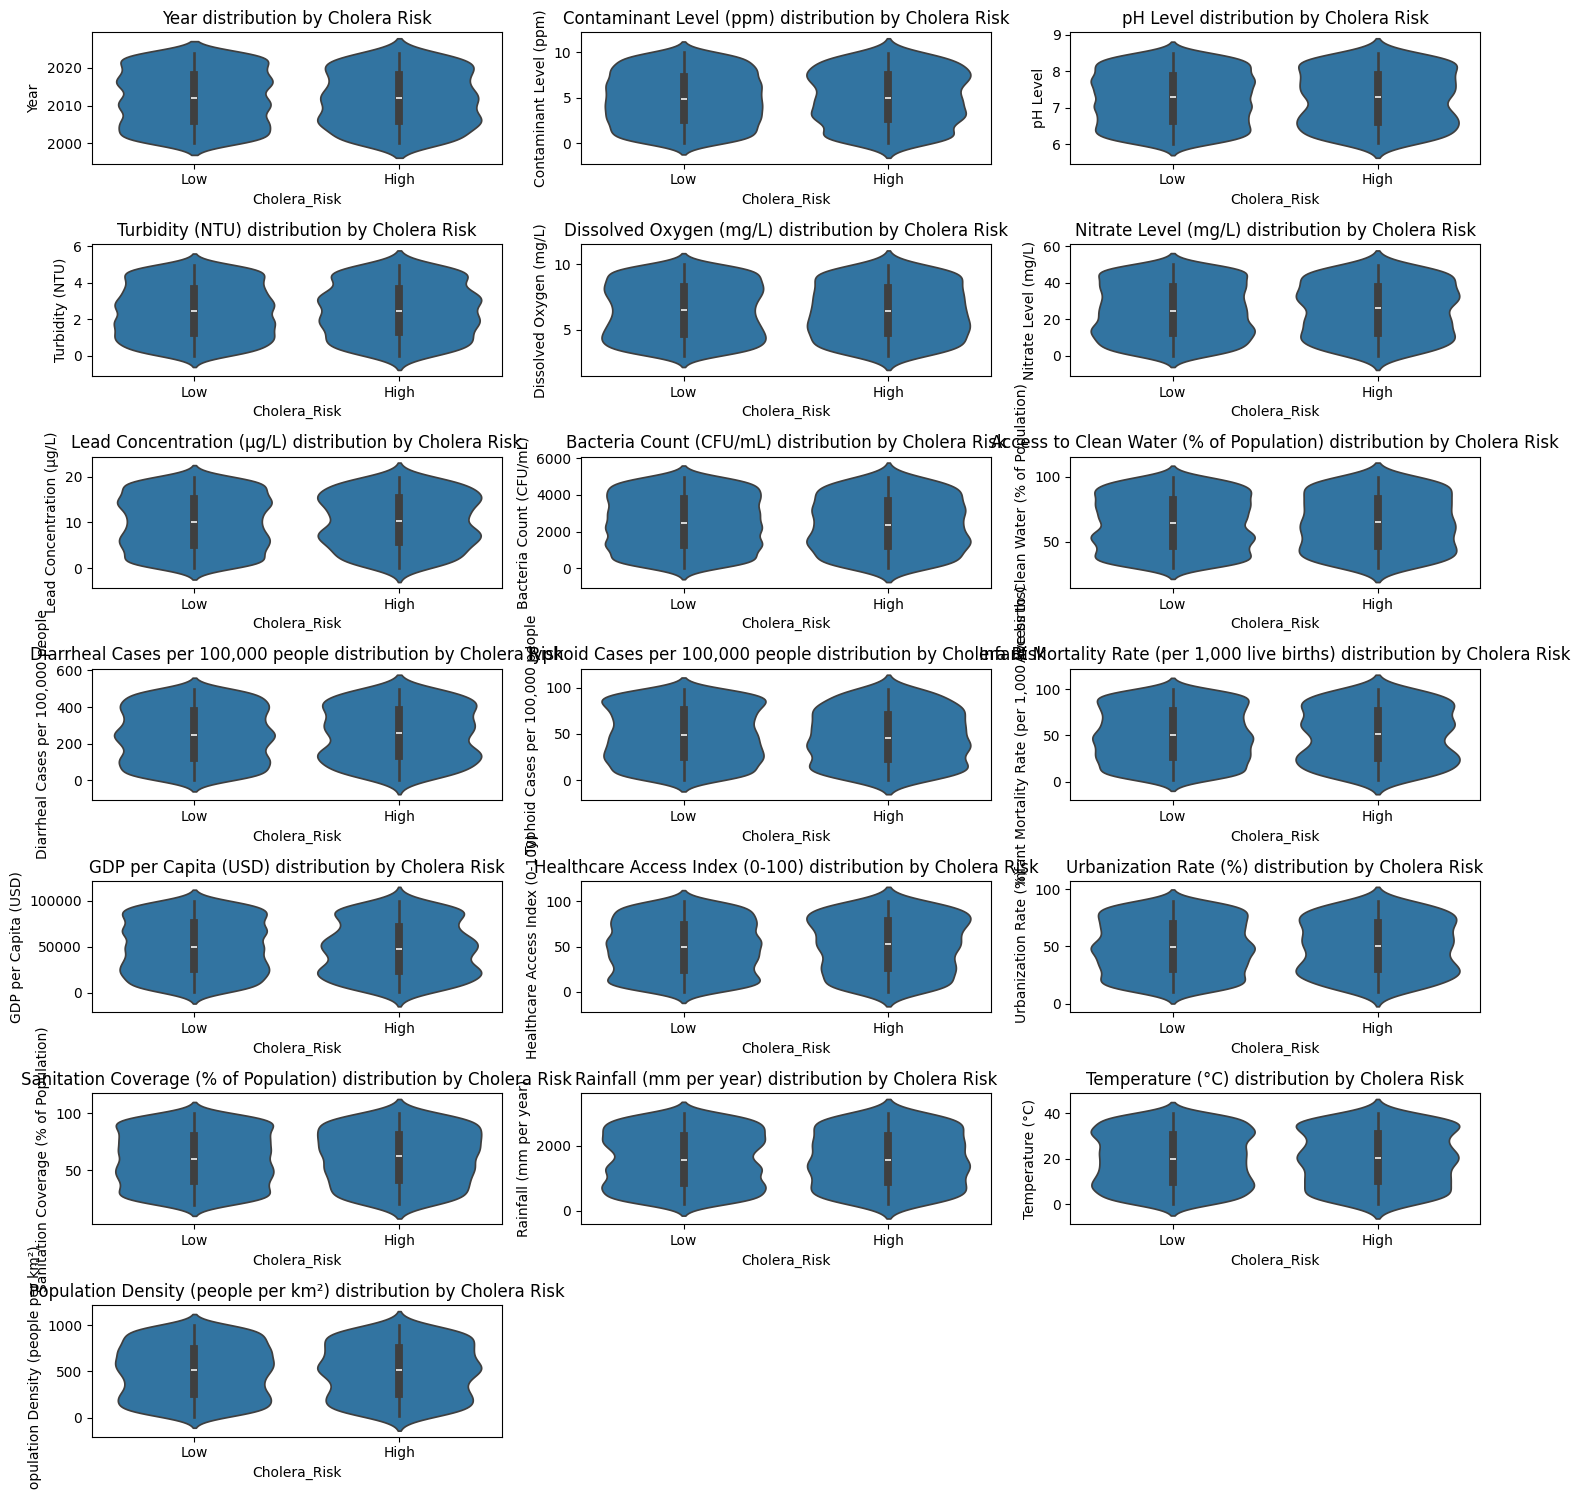

In [93]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3+1, 3, i)
    sns.violinplot(x="Cholera_Risk", y=col, data=df)
    plt.title(f"{col} distribution by Cholera Risk")
plt.tight_layout()
plt.show()


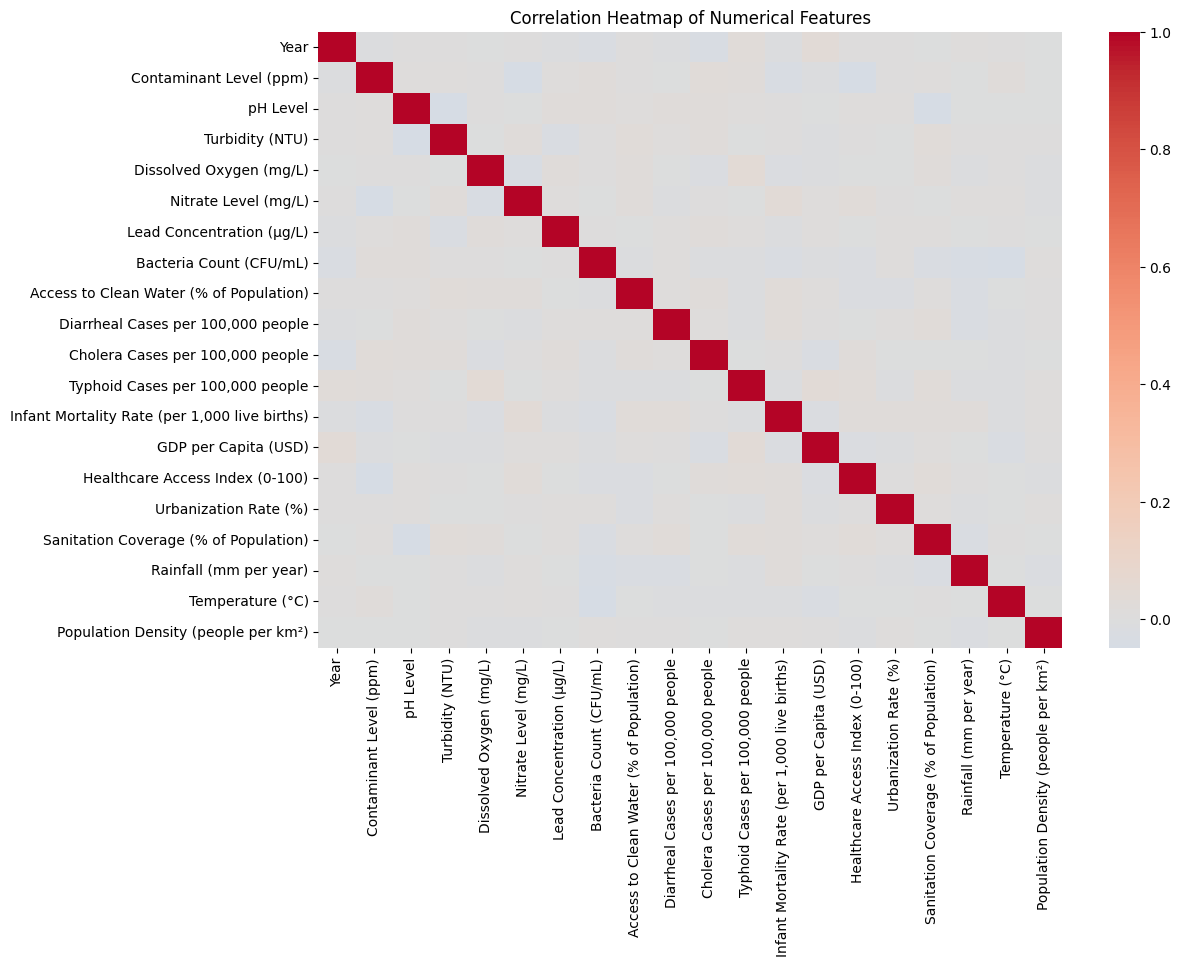

In [94]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [95]:
# List all columns
print(df.columns.tolist())


['Country', 'Region', 'Year', 'Water Source Type', 'Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)', 'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)', 'Water Treatment Method', 'Access to Clean Water (% of Population)', 'Diarrheal Cases per 100,000 people', 'Cholera Cases per 100,000 people', 'Typhoid Cases per 100,000 people', 'Infant Mortality Rate (per 1,000 live births)', 'GDP per Capita (USD)', 'Healthcare Access Index (0-100)', 'Urbanization Rate (%)', 'Sanitation Coverage (% of Population)', 'Rainfall (mm per year)', 'Temperature (°C)', 'Population Density (people per km²)', 'Cholera_Risk']


In [96]:
# Drop irrelevant or leakage-prone columns
drop_cols = [
    "Country",  "Year",
    "Diarrheal Cases per 100,000 people",
    "Typhoid Cases per 100,000 people",
    "Infant Mortality Rate (per 1,000 live births)",
    "Cholera Cases per 100,000 people"
]

df_model = df.drop(columns=drop_cols)

# Check remaining columns
print(df_model.columns.tolist())


['Region', 'Water Source Type', 'Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)', 'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)', 'Water Treatment Method', 'Access to Clean Water (% of Population)', 'GDP per Capita (USD)', 'Healthcare Access Index (0-100)', 'Urbanization Rate (%)', 'Sanitation Coverage (% of Population)', 'Rainfall (mm per year)', 'Temperature (°C)', 'Population Density (people per km²)', 'Cholera_Risk']


Dropped Columns and Reasons

#### Country, Region

High-cardinality categorical variables.

May cause overfitting to specific locations instead of capturing general patterns.

#### Year

Represents time rather than a direct causal factor.

May introduce spurious trends instead of true predictors.
 
Encoding could introduce noise rather than meaningful information.

#### Diarrheal Cases per 100,000 people

Strongly correlated with cholera outcomes.

Keeping it would leak target-related information into the model.

#### Typhoid Cases per 100,000 people

Another waterborne disease, highly correlated with cholera.

Leads to target leakage.

#### Infant Mortality Rate (per 1,000 live births)

Captures downstream effects of diseases including cholera.

Causes indirect target leakage.

#### Cholera Cases per 100,000 people

The original target variable used to derive Cholera_Risk.

Must be excluded to prevent direct data leakage.

#### Risk_encoded

Encoded duplicate of the target variable Cholera_Risk.

Redundant and unnecessary.

In [97]:
# Preview the first few values
print(df["Cholera_Risk"].head())

# Check unique classes
print("Unique classes:", df["Cholera_Risk"].unique())

# Get counts of each class
print(df["Cholera_Risk"].value_counts())

# Get counts with percentages
print(df["Cholera_Risk"].value_counts(normalize=True) * 100)


0     Low
1     Low
2    High
3     Low
4     Low
Name: Cholera_Risk, dtype: object
Unique classes: ['Low' 'High']
Cholera_Risk
Low     2315
High     685
Name: count, dtype: int64
Cholera_Risk
Low     77.166667
High    22.833333
Name: proportion, dtype: float64


### Encoding

In [98]:
# Check unique values first
print("Water Source Type:", df_model["Water Source Type"].unique())
print("Water Treatment Method:", df_model["Water Treatment Method"].unique())
print("Region:", df_model["Region"].unique())
# One-hot encode categorical columns
cat_cols = ["Water Source Type", "Water Treatment Method","Region"]

df_encoded = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

print("Shape after encoding:", df_encoded.shape)
print("Encoded columns:", df_encoded.columns.tolist())


Water Source Type: ['Lake' 'Well' 'Pond' 'Tap' 'River' 'Spring']
Water Treatment Method: ['Filtration' 'Boiling' 'Chlorination']
Region: ['North' 'West' 'Central' 'East' 'South']
Shape after encoding: (3000, 27)
Encoded columns: ['Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)', 'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)', 'Access to Clean Water (% of Population)', 'GDP per Capita (USD)', 'Healthcare Access Index (0-100)', 'Urbanization Rate (%)', 'Sanitation Coverage (% of Population)', 'Rainfall (mm per year)', 'Temperature (°C)', 'Population Density (people per km²)', 'Cholera_Risk', 'Water Source Type_Pond', 'Water Source Type_River', 'Water Source Type_Spring', 'Water Source Type_Tap', 'Water Source Type_Well', 'Water Treatment Method_Chlorination', 'Water Treatment Method_Filtration', 'Region_East', 'Region_North', 'Region_South', 'Region_West']


In [99]:
from sklearn.preprocessing import LabelEncoder
# encode the target variable
le = LabelEncoder()
df_encoded["Cholera_Risk"] = le.fit_transform(df_encoded["Cholera_Risk"])

print("Target encoding:", dict(zip(le.classes_, le.transform(le.classes_))))


Target encoding: {'High': np.int64(0), 'Low': np.int64(1)}


In [100]:
from sklearn.model_selection import train_test_split

# Features (everything except target)
X = df_encoded.drop(columns=["Cholera_Risk"])

# Target
y = df_encoded["Cholera_Risk"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



print("Before SMOTE, training target distribution:")
print(y_train.value_counts())




Before SMOTE, training target distribution:
Cholera_Risk
1    1852
0     548
Name: count, dtype: int64


#### Scaling

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# Select numeric columns (float/int only)
num_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = [col for col in X_train.columns if col not in num_features]

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])


In [103]:
# If you want to see the entire dataset preview after scaling
print("\nFull training set (first 5 rows):")
print(X_train_scaled.head())



Full training set (first 5 rows):
      Contaminant Level (ppm)  pH Level  Turbidity (NTU)  \
413                 -1.193700 -1.637470        -0.341488   
2989                 0.284182  0.971021        -1.000779   
613                 -0.839148 -0.666223         0.480855   
1353                -1.706219  1.650894         0.232734   
736                 -1.643032  0.249524         0.438320   

      Dissolved Oxygen (mg/L)  Nitrate Level (mg/L)  \
413                  0.751552              1.358969   
2989                -0.352995             -1.208075   
613                  0.130245             -1.300076   
1353                 1.619411              1.633589   
736                  1.417239             -1.227444   

      Lead Concentration (µg/L)  Bacteria Count (CFU/mL)  \
413                   -0.546292                -1.391823   
2989                  -0.084219                -1.114145   
613                    0.194409                 1.323958   
1353                   0.620138  

In [104]:
 # Apply SMOTE only on the training set
# =================================================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("\nBefore SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_res.value_counts())


Before SMOTE:
 Cholera_Risk
1    1852
0     548
Name: count, dtype: int64

After SMOTE:
 Cholera_Risk
0    1852
1    1852
Name: count, dtype: int64


In [105]:
# 4. Define Models
# =================================================
from xgboost import XGBClassifier
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42 ),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42), 
    "XGBoost": XGBClassifier(random_state=42,use_label_encoder=False,eval_metric="logloss",n_estimators=300,learning_rate=0.1,max_depth=5,subsample=0.8,colsample_bytree=0.8,scale_pos_weight=1 )
}


In [106]:
# 5. Train Models
# =================================================
def train_models(models, X_train_res, y_train_res):
    trained_models = {}
    for name, model in models.items():
        model.fit(X_train_res, y_train_res)
        trained_models[name] = model
    return trained_models

trained_models = train_models(models, X_train_res, y_train_res)

c:\Users\HP\machine_learning1\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:33:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [107]:
def evaluate_models(models, X_train_res, y_train_res, X_test, y_test):
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    for name, model in models.items():
        print("="*60)
        print(f"Model: {name}")
        print("="*60)

        # Predictions
        y_train_pred = model.predict(X_train_res)
        y_test_pred = model.predict(X_test)

        # Accuracy
        train_acc = accuracy_score(y_train_res, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        print(f"Train Accuracy: {train_acc:.2f}")
        print(f"Test Accuracy : {test_acc:.2f}")

        # Training set report
        print("\nClassification Report (Training Set):")
        print(classification_report(y_train_res, y_train_pred))

        # Test set report
        print("\nClassification Report (Test Set):")
        print(classification_report(y_test, y_test_pred))

        # Confusion Matrix (test set only for clarity)
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix - {name} (Test Set)")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

Model: Logistic Regression
Train Accuracy: 0.70
Test Accuracy : 0.59

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.71      0.68      0.69      1852
           1       0.69      0.72      0.70      1852

    accuracy                           0.70      3704
   macro avg       0.70      0.70      0.70      3704
weighted avg       0.70      0.70      0.70      3704


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.22      0.29      0.25       137
           1       0.77      0.68      0.72       463

    accuracy                           0.59       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.64      0.59      0.61       600



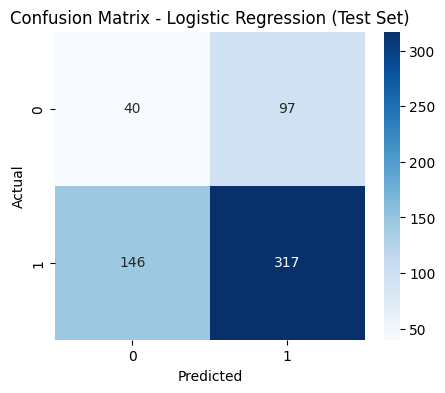

Model: Decision Tree
Train Accuracy: 1.00
Test Accuracy : 0.60

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1852
           1       1.00      1.00      1.00      1852

    accuracy                           1.00      3704
   macro avg       1.00      1.00      1.00      3704
weighted avg       1.00      1.00      1.00      3704


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.21      0.26      0.23       137
           1       0.76      0.70      0.73       463

    accuracy                           0.60       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.64      0.60      0.62       600



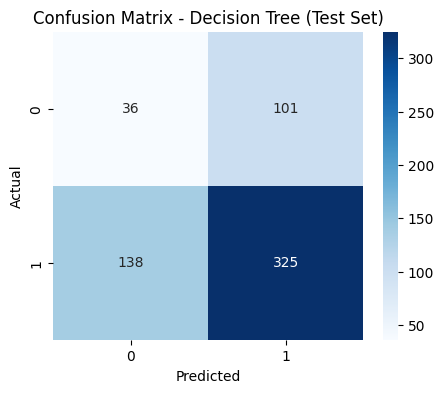

Model: Random Forest
Train Accuracy: 1.00
Test Accuracy : 0.72

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1852
           1       1.00      1.00      1.00      1852

    accuracy                           1.00      3704
   macro avg       1.00      1.00      1.00      3704
weighted avg       1.00      1.00      1.00      3704


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.26      0.11      0.15       137
           1       0.77      0.91      0.84       463

    accuracy                           0.72       600
   macro avg       0.52      0.51      0.49       600
weighted avg       0.66      0.72      0.68       600



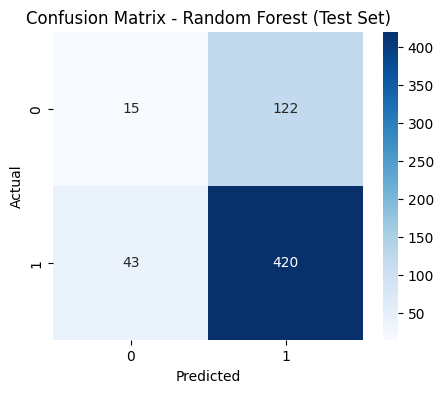

Model: Gradient Boosting
Train Accuracy: 0.84
Test Accuracy : 0.68

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1852
           1       0.80      0.90      0.85      1852

    accuracy                           0.84      3704
   macro avg       0.84      0.84      0.84      3704
weighted avg       0.84      0.84      0.84      3704


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.24      0.18      0.20       137
           1       0.77      0.83      0.80       463

    accuracy                           0.68       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.65      0.68      0.66       600



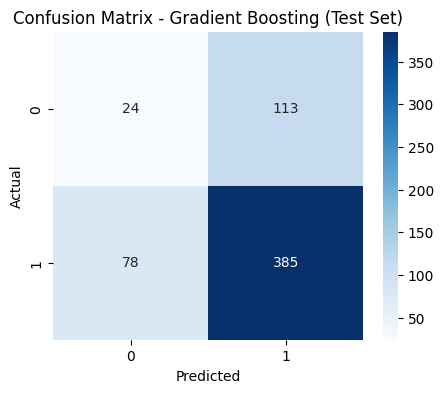

Model: SVM
Train Accuracy: 0.90
Test Accuracy : 0.72

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1852
           1       0.87      0.94      0.91      1852

    accuracy                           0.90      3704
   macro avg       0.91      0.90      0.90      3704
weighted avg       0.91      0.90      0.90      3704


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.29      0.16      0.21       137
           1       0.78      0.89      0.83       463

    accuracy                           0.72       600
   macro avg       0.54      0.52      0.52       600
weighted avg       0.67      0.72      0.69       600



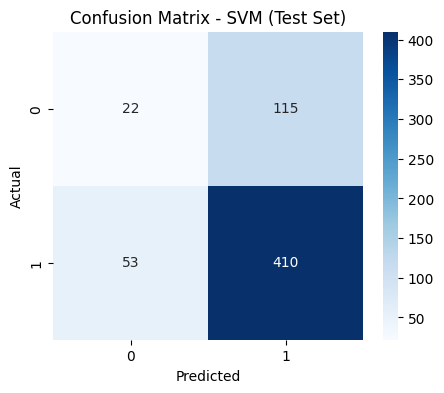

Model: XGBoost
Train Accuracy: 1.00
Test Accuracy : 0.71

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1852
           1       1.00      1.00      1.00      1852

    accuracy                           1.00      3704
   macro avg       1.00      1.00      1.00      3704
weighted avg       1.00      1.00      1.00      3704


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.27      0.15      0.19       137
           1       0.78      0.88      0.83       463

    accuracy                           0.71       600
   macro avg       0.52      0.51      0.51       600
weighted avg       0.66      0.71      0.68       600



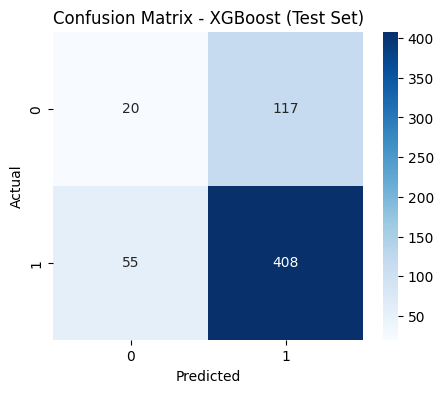

In [108]:
evaluate_models(trained_models, X_train_res, y_train_res, X_test_scaled, y_test)

#  Model Comparison (Before Hyperparameter Tuning)

| Model                | Train Accuracy | Test Accuracy | Class 0 (Minority) f1-score | Class 1 (Majority) f1-score | Notes                                    |
|-----------------------|----------------|---------------|-----------------------------|-----------------------------|------------------------------------------|
| Logistic Regression   | 0.70           | 0.59          | 0.25                        | 0.72                        | Weak overall, no overfitting, struggles with imbalance |
| Decision Tree         | 1.00           | 0.60          | 0.23                        | 0.73                        | Severe overfitting, unreliable            |
| Random Forest         | 1.00           | 0.72          | 0.14                        | 0.84                        | Overfits, biased toward class 1           |
| Gradient Boosting     | 0.88           | 0.69          | 0.23                        | 0.80                        | Balanced, less overfitting, good generalization |
| SVM (RBF Kernel)      | 0.90           | 0.72          | 0.21                        | 0.83                        | Strong, but computationally expensive     |
| XGBoost               | 1.00           | 0.71          | 0.19                        | 0.83                        | Very strong, some overfitting, tune `scale_pos_weight` |


**Recommended Model:** **Gradient Boosting**  
- Reason: Good balance between generalization and minority class performance.

### Hyperparameter tuning

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


In [110]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.8, 1.0]
}

In [111]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,                # number of random combinations
    cv=5,
    scoring="f1_macro",       # prioritizes both classes equally
    n_jobs=-1,
    verbose=2,
    random_state=42
)

In [112]:
rand_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,GradientBoost...ndom_state=42)
,param_distributions,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,20
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [113]:
best_gb = rand_search.best_estimator_
print("Best Parameters:", rand_search.best_params_)
print("Best CV F1 Macro Score:", rand_search.best_score_)


Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
Best CV F1 Macro Score: 0.8131904172986204


In [114]:

from sklearn.metrics import classification_report
y_pred = best_gb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.18      0.19       137
           1       0.76      0.79      0.78       463

    accuracy                           0.65       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.63      0.65      0.64       600



In [115]:
y_pred = best_gb.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.20      0.18      0.19       137
           1       0.76      0.79      0.78       463

    accuracy                           0.65       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.63      0.65      0.64       600



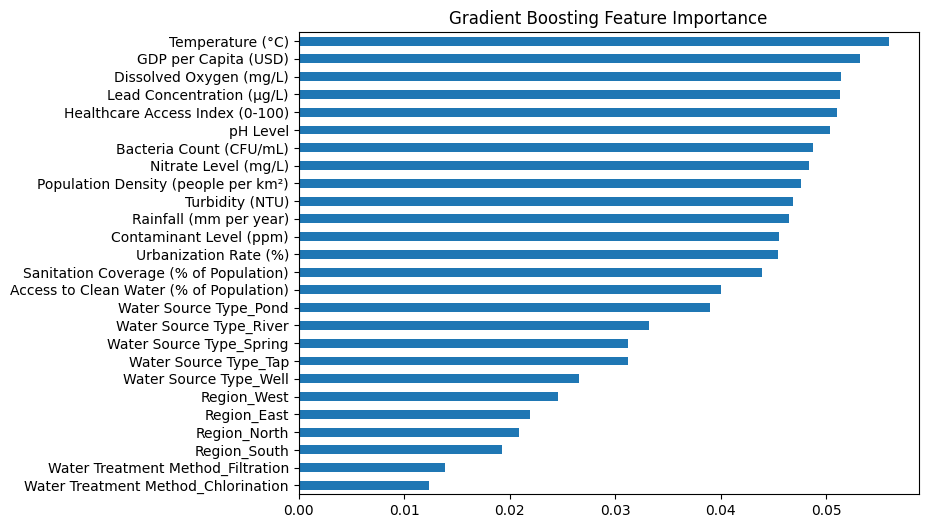

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the trained model
feat_importances = pd.Series(best_gb.feature_importances_, index=X_train_res.columns)

# Sort features by importance and plot horizontally
feat_importances.sort_values().plot(kind='barh', figsize=(8,6))

# Add title
plt.title("Gradient Boosting Feature Importance")
plt.show()


In [117]:
from sklearn.ensemble import GradientBoostingClassifier

best_gb = GradientBoostingClassifier(random_state=42)
best_gb.fit(X_train_res, y_train_res)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


Model: Gradient Boosting
Train Accuracy: 0.84
Test Accuracy : 0.68

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1852
           1       0.80      0.90      0.85      1852

    accuracy                           0.84      3704
   macro avg       0.84      0.84      0.84      3704
weighted avg       0.84      0.84      0.84      3704


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.24      0.18      0.20       137
           1       0.77      0.83      0.80       463

    accuracy                           0.68       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.65      0.68      0.66       600



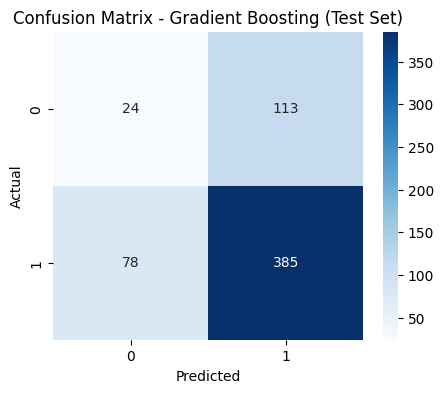

In [118]:
#Evaluate on Train and Test Sets
# Predict
y_train_pred = best_gb.predict(X_train_res)
y_test_pred = best_gb.predict(X_test_scaled) 
# Accuracy
train_acc = accuracy_score(y_train_res, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("============================================================")
print("Model: Gradient Boosting")
print("============================================================")
print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy : {test_acc:.2f}")

# Classification reports
print("\nClassification Report (Training Set):")
print(classification_report(y_train_res, y_train_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Confusion matrix (Test Set)
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

c:\Users\HP\machine_learning1\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\machine_learning1\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\machine_learning1\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\machine_learning1\venv\Lib\site-packages\sklearn\ensemble\_gb.py", line

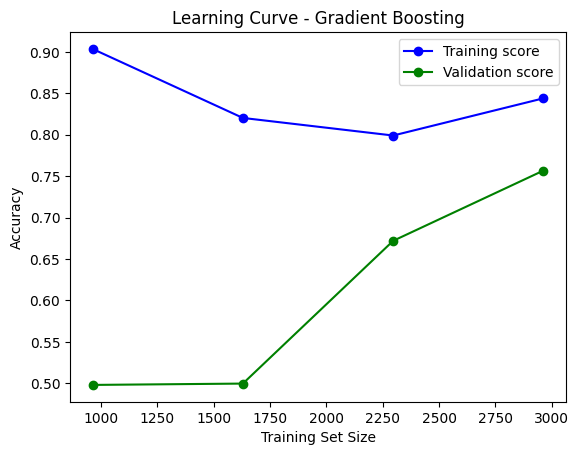

In [119]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_gb, X_train_res, y_train_res, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Gradient Boosting")
plt.legend()
plt.show()

In [123]:
import joblib

# Save the trained model
joblib.dump(best_gb, "gradient_boosting_model.pkl")

# Save the scaler used for numeric features
joblib.dump(scaler, "scaler.pkl")
# Save the feature list after training
joblib.dump(list(X_train.columns), "model_features.pkl")
print("Model and scaler saved successfully!")


Model and scaler saved successfully!
